In [1]:
%matplotlib inline
%config InlineBackent.figure_format = 'retina'
import numpy as np
import torch
import helper as helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim

In [28]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [15]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5), (0.5)),])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
images, labels = dataiter.next()

0it [00:00, ?it/s]

Extracting /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /dartfs-hpc/rc/home/z/f00662z/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [25]:
#Model, Optimizer, and Loss Function
model = nn.Sequential(nn.Linear(784, 128), 
                      nn.ReLU(),
                      nn.Linear(128, 64), 
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0095)
#training network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0508214165406948
Training loss: 0.5734675332967406
Training loss: 0.5034770247206759
Training loss: 0.4647242901707763
Training loss: 0.4389906929913106


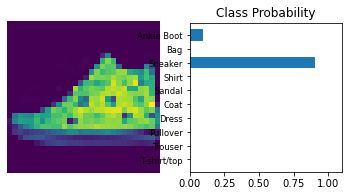

In [37]:

# Testing Network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# Calculating the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Ploting the image and probabilities
helper.view_classify(img, ps, version='Fashion')